# Moving to the East from London

In this project we are creating a path around the world starting from London. It is only possible to move to one of the three cities that are closest to the current city in our dataset. The main aim is to reach to the easternmost city that is reachable following the given restrictions of movement. At the end, we calculated the total time spent to go to the easternmost city from London. 
For this purpose, initially we call our classes to import our functions required to process the data and return us the information we need.

In [1]:
from classes import CityPreprocessor, DistanceCalculator, CostCalculator, RouteCalculator, EastestCityFinder, PlotMaker
import pandas as pd
import numpy as np

The information about the cities is stored in an excell file and it is preprocesseed by defining instance of the CityPreprocessor class and by using load_and_preprocess_data function. Output data is read excell data without the cities with latitude values above 30 for simplicity; which contained and sorted by the relative distances of each city to London. 
The data at the end is randomly sampled to enable easier processing of the sampled data with length 500. 

Then we define the instances to other classes created (DistanceCalculator, CostCalculator, RouteCalculator, EastestCityFinder, PlotMaker). 
DistanceCalculator class is responsible of the calculation of Haversine distances, the shortest distance between two cities on the surface of the Earth. 
CostCalculator class is defined for calculations of the cost of going to each city in terms of hours. The calculations were done based on the following assumptions: it takes 2 hours to reach the first, 4 hours to reach the second, and 8 hours to reach to the third closest city to the current location. Also, following parameters were taken into account: if the population of the arrival city is over 200.000, and/or if we have to change the countury to arrive to the next city, it takes additional 2 hours to get there for each condition that applies. 

In [2]:
excel_path = r'C:\Users\Dilsan\Desktop\Coding for Data Science and Data Management\Python\Project\worldcities.xlsx'
london_lat = 51.5072
london_lng = -0.1275

city_preprocessor = CityPreprocessor(excel_path, london_lat, london_lng)
preprocessed_data = city_preprocessor.load_and_preprocess_data()


dc = DistanceCalculator()
cc = CostCalculator()
rc = RouteCalculator(preprocessed_data,cc,dc)
ecf = EastestCityFinder()
pm = PlotMaker()
info_cities = rc.calculate_route()
result = ecf.go_most_east(info_cities)

In [3]:
preprocessed_data

,city_name,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,city_id,distance_km
0,London,London,51.5072,-0.1275,United Kingdom,GB,GBR,"London, City of",primary,10979000.0,1826645935,0.000000
1,East Finchley,East Finchley,51.5902,-0.1753,United Kingdom,GB,GBR,Barnet,NaN,15989.0,1826180591,9.803167
2,Kenton,Kenton,51.5878,-0.3086,United Kingdom,GB,GBR,Brent,NaN,35600.0,1826411445,15.399424
3,Sidcup,Sidcup,51.4263,0.1024,United Kingdom,GB,GBR,Bexley,NaN,43109.0,1826363364,18.290429
4,Borehamwood,Borehamwood,51.6578,-0.2723,United Kingdom,GB,GBR,Hertfordshire,NaN,31955.0,1826433403,19.507078
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Tsukuba-kenkyūgakuen-toshi,Tsukuba-kenkyugakuen-toshi,36.0333,140.0667,Japan,JP,JPN,Ibaraki,NaN,240987.0,1392112466,9537.255861
496,Hokota,Hokota,36.1586,140.5164,Japan,JP,JPN,Ibaraki,NaN,46415.0,1392374973,9540.539550
497,Kashima,Kashima,35.9658,140.6450,Japan,JP,JPN,Ibaraki,NaN,67448.0,1392346235,9564.800984
498,Matsuda-sōryō,Matsuda-soryo,35.3483,139.1394,Japan,JP,JPN,Kanagawa,NaN,10884.0,1392523691,9573.176980


The info_cities dictionary is created by the RouteCalculator class. The key values of the dictionary are the city ids, and the dictionary contains the following information about the three closest city to the key city; the city_names, city_ids, city_distances, city_latitudes, city_longitudes, city_populations, city_countries, city_total_cost. These information are then utilized to optimize the route cost to the east.

In [12]:
pd.Series(info_cities).head(10)


1826645935    {'city_names': ['East Finchley', 'Kenton', 'Si...
1826180591    {'city_names': ['Kenton', 'London', 'Borehamwo...
1826411445    {'city_names': ['Borehamwood', 'East Finchley'...
1826363364    {'city_names': ['Swanscombe', 'Northfleet', 'L...
1826433403    {'city_names': ['Kenton', 'East Finchley', 'Go...
1826459935    {'city_names': ['Borehamwood', 'East Finchley'...
1826455512    {'city_names': ['Kenton', 'Marlow', 'Great Boo...
1826018472    {'city_names': ['Northfleet', 'Stanford le Hop...
1826910231    {'city_names': ['Colnbrook', 'London', 'Kenton...
1826633103    {'city_names': ['Swanscombe', 'Stanford le Hop...
dtype: object

The result dictionary is returned by EastestCityFinder class which takes as an input the info_cities dictionary to find the city that is located at the easternmost location among the three nearest cities of the cities and repeats this operation for each city keys. Once the easternmost city indexes are collected they are used to find the country_city names (as key values), and their corresponding latitude and longitude values, and they are assigned to a dictionary called result. This dictionary gives us the whole path around the world to the East, starting from London to the last reachable point by following the easternmost cities among the three nearest cities.  

In [13]:
pd.Series(result).head(10)

United Kingdom_Sidcup               (51.4263, 0.1024)
United Kingdom_London              (51.5072, -0.1275)
United Kingdom_Northfleet               (51.44, 0.34)
United Kingdom_Goffs Oak           (51.7109, -0.0825)
United Kingdom_East Finchley       (51.5902, -0.1753)
United Kingdom_Kenton              (51.5878, -0.3086)
United Kingdom_Strood                 (51.393, 0.478)
United Kingdom_Stanford le Hope      (51.514, 0.4244)
United Kingdom_Borehamwood         (51.6578, -0.2723)
United Kingdom_Sawston              (52.1247, 0.1731)
dtype: object

The total time it takes to complete this path following these route restrictions turned out to be 115 days.

In [14]:
(ecf.total_cost)/24

115.0

Here we can also see how many cities are visited per country while following this path. The bar plot is returned by the cities_plot function in PlotMaker class.

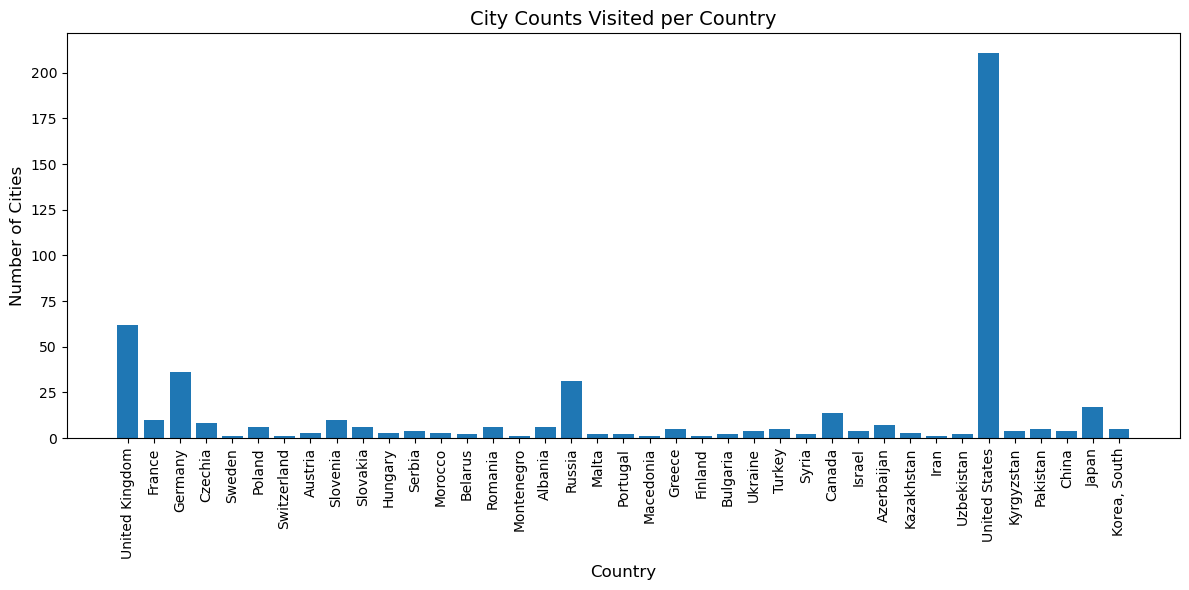

In [15]:
pm = PlotMaker()
pm.cities_plot(ecf.city_and_country)


Lastly, we write the dictionary (result) to a JSON file, 'result_dict.json' and assigning the result of json.dump to the variable json_path. Making the json file available json_path json file for Streamlit application. 

In [16]:
#open dictionary of results in write mode: countries_cities, coordinates
import json
with open('result_dict.json', 'w') as json_file:
    json_path = json.dump(result, json_file)

We can now run RunStreamlit class to visualize our interactive map on the web app. 